In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
img_highres = cv2.imread('/home/denis/GitHub/FashionML/data/img_highres/2-in-1_Space_Dye_Athletic_Tank/img_00000001.jpg')
img = cv2.imread('/home/denis/GitHub/FashionML/data/img/2-in-1_Space_Dye_Athletic_Tank/img_00000001.jpg')

In [3]:
box_cor = [(38, 66), (146, 268)]

In [4]:
img = cv2.rectangle(img, (38, 66), (146, 268), (0,255,0), 3)
img_highres = cv2.rectangle(img_highres, (38, 66), (146, 268), (0,255,0), 3)

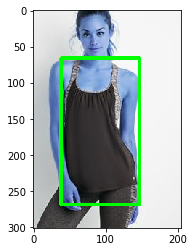

In [5]:
plt.imshow(img.astype(np.uint8))

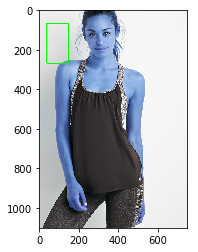

In [6]:
plt.imshow(img_highres)

In [7]:
import pandas as pd

In [8]:
list_landmarks = pd.read_csv('data/Anno/list_landmarks.csv')

In [9]:
def draw_boxes(img, bboxes, classes, text):
    w, h, _ = img.shape
    for i, box in enumerate(bboxes):
        scale_img = [h, w, h, w]
        box = [int(a*b) for a,b in zip(box, scale_img)]
        draw_box(img, classes[i], text, box)

def draw_box(img, cls, text, box):
    hsv = np.array([[[int(cls/float(len(text))*255), 255, 255]]], dtype=np.uint8)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)[0, 0, :]
    bgr = [int(i) for i in bgr]
    cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), bgr, 2)
    cv2.putText(img, text, (box[1], box[0]), cv2.FONT_HERSHEY_SIMPLEX, 1, bgr)

In [10]:
bbox_img = pd.read_csv('data/Anno/annotation_w-o_atr.csv')
img = cv2.imread('data/'+bbox_img.loc[0]['Path'])

In [11]:
draw_boxes(img, [bbox_img.loc[0][['x','y', 'width', 'height']].values], [50], 'Some')

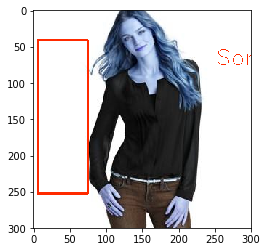

In [12]:
plt.imshow(img)

In [13]:
bbox_img.loc[0][['x','y', 'width', 'height']].values

array([0.2516666666666667, 0.8416666666666667, 0.02333333333333333,
       0.1366666666666667], dtype=object)